<a href="https://colab.research.google.com/github/fc0712/DSBA-project-Airbnb_LA/blob/master/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install --quiet mapclassify
import mapclassify

# Plotting theme
! pip install --quiet pyplot_themes
import pyplot_themes as themes
themes.theme_minimal(grid=False,palette=themes.palettes.Diverging.bluepurple)

#themes.palettes.Diverging.bluepurple

In [2]:
# Loading Data 

data_listing = pd.read_csv("https://github.com/fc0712/DSBA-project-Airbnb_LA/blob/master/data/airbnb_cleaned.csv?raw=true")
data_listing.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathroom_type,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,...,Iron,Keypad,Kitchen,Laptop-friendly workspace,Laundromat nearby,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Mini fridge,Outlet covers,Oven,Pack \u2019n Play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Pets allowed,Pocket wifi,Pool,Portable fans,Private entrance,Private living room,Refrigerator,Rice Maker,Room-darkening shades,Self check-in,Shampoo,Shower gel,Single level home,Smart lock,Smoke alarm,Stair gates,Stove,TV,Washer,Waterfront,Wifi,Window guards,price_per_room
0,2708,https://www.airbnb.com/rooms/2708,20201009145904,2020-10-10,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,Beautiful Furnished Mirror Mini-Suite w/ Firep...,We are minutes away from the Mentor Language I...,https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within a few hours,100%,100%,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,Hollywood,City of Los Angeles,34.09768,-118.34602,private room,Private room,1,1.5,bath,1.0,1.0,"""Bed linens"", ""Essentials"", ""Patio or balcony""...",75.0,30,366,...,1,0,1,1,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,75.0
1,2732,https://www.airbnb.com/rooms/2732,20201009145904,2020-10-18,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,Yoga Priestess,2008-09-17,"Santa Monica, California, United States",I have been teaching yoga and meditation for 3...,within an hour,92%,50%,f,https://a0.muscache.com/im/users/3041/profile_...,https://a0.muscache.com/im/users/3041/profile_...,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Santa Monica,Other Cities,34.00475,-118.48127,private room,Private room,1,1.0,private bath,1.0,1.0,"""Hangers"", ""Refrigerator"", ""Dishes and silverw...",155.0,1,180,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,155.0
2,5729,https://www.airbnb.com/rooms/5729,20201009145904,2020-10-25,Zen Room with Floating Bed near Venice and LAX,Our home is located near Venice Beach without ...,Our neighborhood is very quiet and save. There...,https://a0.muscache.com/pictures/f48e3ea8-2075...,9171,https://www.airbnb.com/users/show/9171,Sanni,2009-03-05,"Los Angeles, California, United States",we are loving our home and would like to share...,within a few hours,89%,94%,t,https://a0.muscache.com/im/pictures/user/99373...,https://a0.muscache.com/im/pictures/user/99373...,8.0,8.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,Del Rey,City of Los Angeles,33.98750,-118.43200,private room,Private room,3,1.0,shared bath,1.0,1.0,"""Shampoo"", ""Fire extinguisher"", ""Washer"", ""Mic...",70.0,30,1125,...,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,70.0
3,5843,https://www.airbnb.com/rooms/5843,20201009145904,2020-10-11,Artist Oasis near Venice Beach w/ Beautiful Ga...,Do you want a taste of Paradise?<br />Our one-...,Our neighborhood is very quiet and save. There...,https://a0.muscache.com/pictures/25d657aa-2529...,9171,https://www.airbnb.com/users/sh



## Prices

Price Distribution

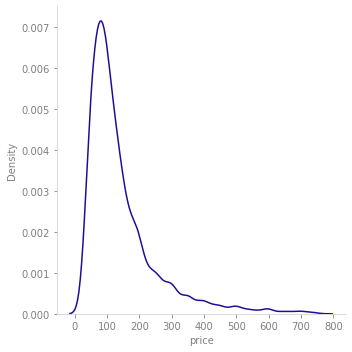

In [3]:
# Showing the price distribution
sns.displot(data_listing.price,kind="kde")
plt.savefig("figure_2.svg")

**Prices and Property Types **

In [4]:
data_listing.property_type.value_counts(normalize=True)

private room                 0.282084
Entire apartment             0.258882
Entire house                 0.174738
Entire guesthouse            0.084650
Entire guest suite           0.052535
Entire condominium           0.040776
Entire bungalow              0.026805
Entire townhouse             0.017638
Entire loft                  0.017132
Room in boutique hotel       0.006828
Entire cottage               0.006828
Entire serviced apartment    0.006638
shared room                  0.006512
Room in aparthotel           0.005247
Entire villa                 0.003920
Camper/RV                    0.003287
Tiny house                   0.002971
Room in hotel                0.002529
Name: property_type, dtype: float64

In [5]:
#replacing the property types occuring less than 1000 times with "others" for graph
dict_prop = {"property_type": 
            {'Entire guest suite' : 'others',        
            'Entire condominium' : 'others',            
            'Entire bungalow' : 'others',               
            'Entire loft' : 'others',                   
            'Entire townhouse' : 'others',             
            'Room in boutique hotel' : 'others',        
            'Entire serviced apartment' : 'others',     
            'Entire cottage' : 'others',                
            'Room in aparthotel' : 'others',             
            'shared room' : 'others',                    
            'Tiny house' : 'others',                     
            'Camper/RV' : 'others',                      
            'Room in hotel' : 'others',                  
            'Entire villa' : 'others',}
            }

data_prop = data_listing.copy()
data_prop.replace(dict_prop, inplace = True)
data_prop.property_type.value_counts()



private room         4462
Entire apartment     4095
others               3158
Entire house         2764
Entire guesthouse    1339
Name: property_type, dtype: int64

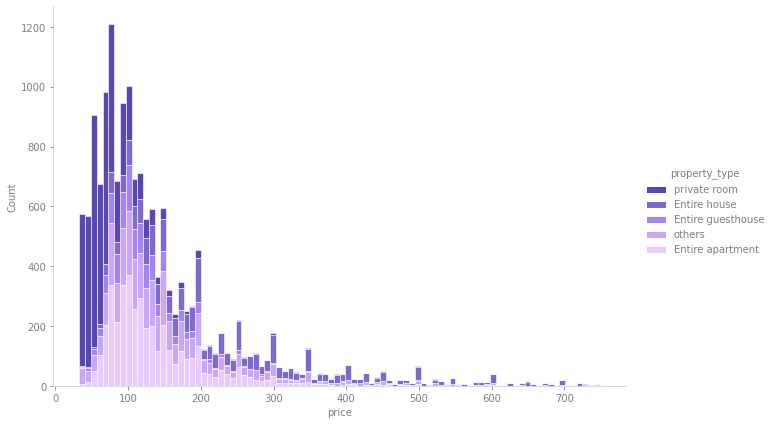

In [6]:
#Plotting the distribution of property types and price
sns.displot(data_prop, x="price", hue="property_type", multiple="stack", height=6, aspect=1.5)
plt.savefig("figure_3.svg")
plt.show()

**Is there a difference price difference between the different neighborhoods in LA?**

In [7]:
#checking the top 5 and lowest 5 neighborhoods measured on mean price
bar_neigh_price = data_listing.groupby("neighborhood")["price_per_room"].mean().sort_values(ascending=False)

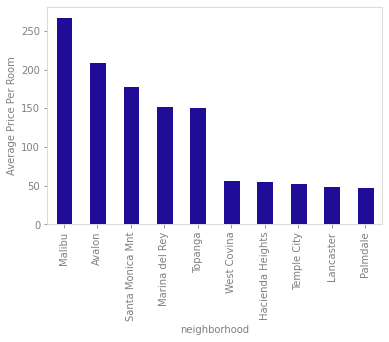

In [8]:
# Creating small and highest bar
smallest_bar = bar_neigh_price.nsmallest(5)
highest_bar  =bar_neigh_price.nlargest(5)
highest_bar.rename({"Unincorporated Santa Monica Mountains": "Santa Monica Mnt"},inplace=True)
# Appending to a total series
total_bar = smallest_bar.append(highest_bar).sort_values(ascending=False)

# Creating Plot
total_bar.plot(kind="bar",ylabel = "Average Price Per Room")

plt.savefig("figure_4.svg")

### Price Map

In [9]:
# installing geopandas and plotly
! pip install -q plotly
! pip install geopandas -q
# importing geojson from insideairbnb

import geopandas
neighborhood_geo = geopandas.read_file('http://data.insideairbnb.com/united-states/ca/los-angeles/2020-10-09/visualisations/neighbourhoods.geojson')

     |████████████████████████████████| 972kB 7.1MB/s 
     |████████████████████████████████| 14.8MB 306kB/s 
     |████████████████████████████████| 6.5MB 49.0MB/s 


In [10]:
# importing geojson from insideairbnb
import geopandas
neighborhood_geo = geopandas.read_file('http://data.insideairbnb.com/united-states/ca/los-angeles/2020-10-09/visualisations/neighbourhoods.geojson')

#renaming columns
neighborhood_geo.columns= ["neighborhood","neighborhood_group",	"geometry"]

# Creating variables for plotting
price_rating = data_listing.groupby("neighborhood")[["price","review_scores_location","price_per_room"]].mean().reset_index()

#Merging geodf and price/rating df
merged_df = neighborhood_geo.merge(price_rating,how="outer")

# showing df
merged_df.head(2)

,neighborhood,neighborhood_group,geometry,price,review_scores_location,price_per_room
0,Angeles Crest,Unincorporated Areas,"MULTIPOLYGON (((-118.09667 34.47348, -118.0796...",NaN,NaN,NaN
1,Acton,Unincorporated Areas,"MULTIPOLYGON (((-118.20703 34.53902, -118.1894...",NaN,NaN,NaN


In [11]:
merged_df.price_per_room

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
265          NaN
266    72.174917
267    77.248333
268    97.594790
269          NaN
Name: price_per_room, Length: 270, dtype: float64

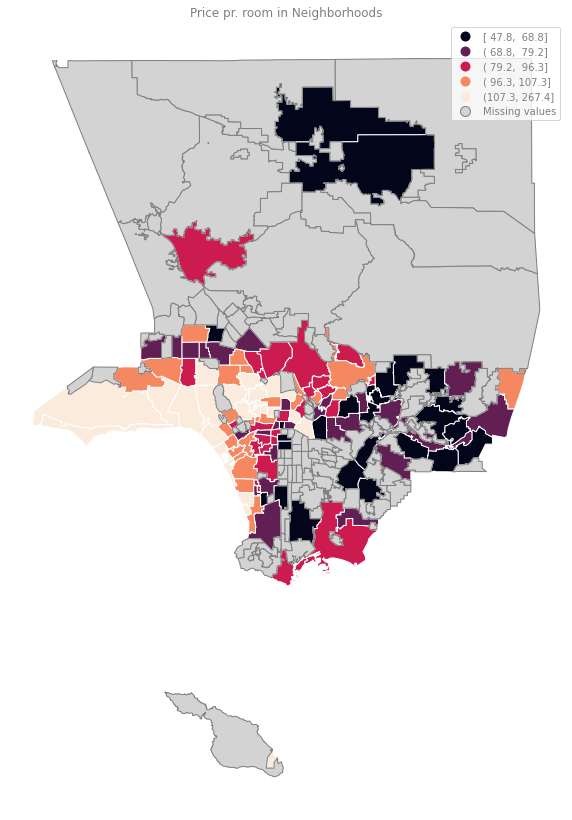

In [12]:
# Creating figure and axis
fig,ax = plt.subplots(1,1,figsize=((10,15)))
# Plotting onto axis
merged_df.plot("price_per_room",ax=ax,legend=True,scheme="Quantiles",legend_kwds={'fmt':'{:.01f}'},missing_kwds = {"color": "lightgrey",
        "edgecolor": "grey",
            "label": "Missing values"})

# Creating some layout 
plt.axis("off")
plt.title("Price pr. room in Neighborhoods")
plt.savefig("figure_5.svg")
plt.show()

## Reviews

### Heatmap

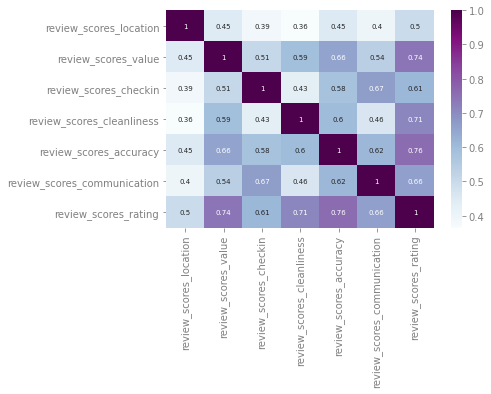

In [13]:
#displaying the correlation between the different review scores

correlation_rev = data_listing[["review_scores_location",          
"review_scores_value",            
"review_scores_checkin",           
"review_scores_cleanliness",       
"review_scores_accuracy",          
"review_scores_communication",     
"review_scores_rating"]].corr()

sns.heatmap(correlation_rev, annot=True, annot_kws={"size": 7},cmap="BuPu")
plt.savefig("figure_6.svg")
plt.show()



### Location Review Map

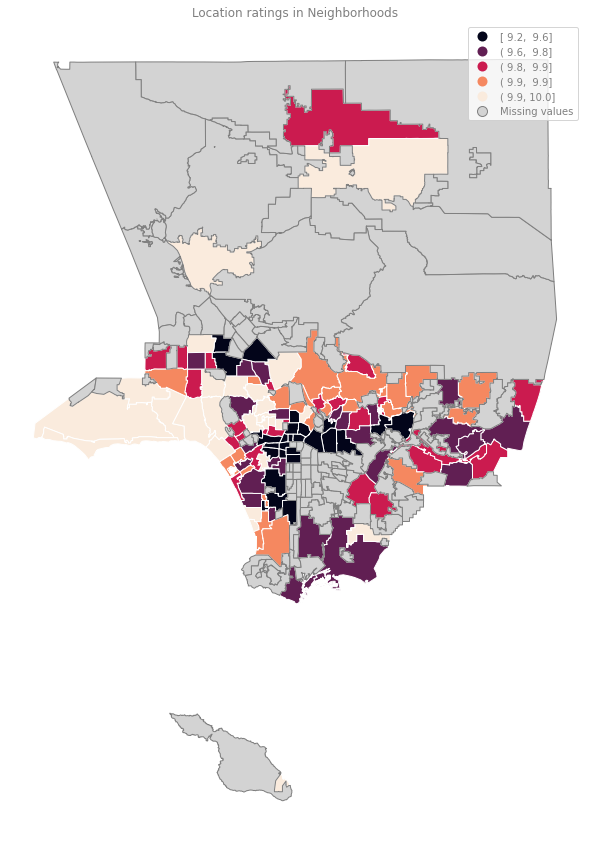

In [14]:
# Creating figure and axis
fig,ax = plt.subplots(1,1,figsize=((15,15)))
# Plotting onto axis
merged_df.plot("review_scores_location",ax=ax,legend=True,scheme = "Quantiles", 
               legend_kwds={'fmt':'{:.01f}'},missing_kwds = {"color": "lightgrey",
        "edgecolor": "grey",
            "label": "Missing values"})

# Creating some layout 
plt.axis("off")
plt.title("Location ratings in Neighborhoods")
plt.savefig("figure_7.svg")
plt.show()

### Landlord Types and Reviews

In [15]:
# Creating new column landlord_type with business >= 3 else private
data_listing["landlord_type"] = data_listing.calculated_host_listings_count_entire_homes.apply(lambda x: "Business" if x >= 3 else "Private")

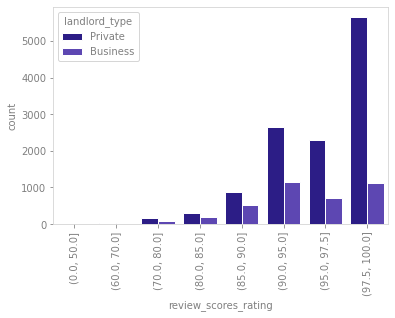

In [16]:
# Creating barplot with reviews  - Count version
intervals_reviewscore = pd.IntervalIndex.from_tuples([(0, 50), (60, 70), (70, 80), (80, 85), (85, 90), (90, 95), 
              (95, 97.5), (97.5,100)])
review_score_bins = pd.cut(data_listing.review_scores_rating,bins=intervals_reviewscore)
sns.countplot(x=review_score_bins,hue=data_listing.landlord_type)
plt.xticks(rotation=90)
plt.show()

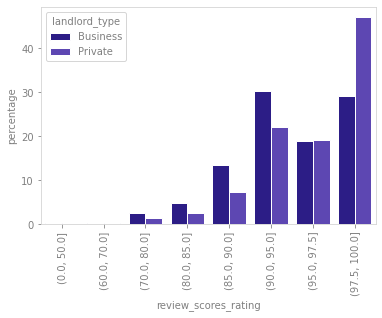

In [17]:
# Creating Version with percentage instead
percentage_barplot = (data_listing.groupby(['landlord_type'])['review_scores_rating']
                     .value_counts(normalize=True,bins=intervals_reviewscore)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(by="review_scores_rating"))
plot_rev = sns.barplot(x="review_scores_rating", y="percentage", hue="landlord_type", data=percentage_barplot)
_ = plt.setp(plot_rev.get_xticklabels(), rotation=90)

plt.savefig("figure_8.svg")

## New Feautures

### Distances to Tourist locations

$ distance (d) = 2r \arcsin\left(\sqrt{\sin^2\left(\frac{\varphi_2 - \varphi_1}{2}\right) + \cos(\varphi_1) \cos(\varphi_2)\sin^2\left(\frac{\lambda_2 - \lambda_1}{2}\right)}\right) $

Source: https://en.wikipedia.org/wiki/Haversine_formula

In [18]:
# Creating Haversine Function
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

In [19]:
# Creating a dictionary with places to show distance to 

places_dict = { "santa_monica": (34.010027, -118.495994),
               "hollywood_walk": (34.101617, -118.327006),
               "getty_center": (34.077978, -118.474064),
               "venice_beach": (33.987223, -118.473776),
               "griffith": (34.118586, -118.300013),
               "uni_studios": (34.118586, -118.300013),
               "disneyland" : (34.118586, -118.300013),
               "rodeo_drive" : (34.069206, -118.402944)}

In [20]:
# Using pandas apply() to create new rows with distance to POI
data_listing["distance_santa_monica"] = data_listing.apply(lambda row: haversine_distance(row["latitude"],row["longitude"],places_dict["santa_monica"][0], places_dict["santa_monica"][1]),axis=1)
data_listing["distance_hollywood_walk"] = data_listing.apply(lambda row: haversine_distance(row["latitude"],row["longitude"],places_dict["hollywood_walk"][0], places_dict["hollywood_walk"][1]),axis=1)
data_listing["distance_getty_center"] = data_listing.apply(lambda row: haversine_distance(row["latitude"],row["longitude"],places_dict["getty_center"][0], places_dict["getty_center"][1]),axis=1)
data_listing["distance_venice_beach"] = data_listing.apply(lambda row: haversine_distance(row["latitude"],row["longitude"],places_dict["venice_beach"][0], places_dict["venice_beach"][1]),axis=1)
data_listing["distance_griffith"] = data_listing.apply(lambda row: haversine_distance(row["latitude"],row["longitude"],places_dict["griffith"][0], places_dict["griffith"][1]),axis=1)
data_listing["distance_uni_studios"] = data_listing.apply(lambda row: haversine_distance(row["latitude"],row["longitude"],places_dict["uni_studios"][0], places_dict["uni_studios"][1]),axis=1)
data_listing["distance_disneyland"] = data_listing.apply(lambda row: haversine_distance(row["latitude"],row["longitude"],places_dict["disneyland"][0], places_dict["disneyland"][1]),axis=1)
data_listing["distance_rodeo_drive"] = data_listing.apply(lambda row: haversine_distance(row["latitude"],row["longitude"],places_dict["rodeo_drive"][0], places_dict["rodeo_drive"][1]),axis=1)

In [21]:
# Checking if it worked correctly
data_listing[["distance_santa_monica","distance_hollywood_walk"]].head()

,distance_santa_monica,distance_hollywood_walk
0,16.91,1.80
1,1.48,17.83
2,6.41,15.96
3,6.41,15.96
4,16.60,2.06


Correlation with price per room and distances

In [22]:
# Creating dataframe with distances and price per room columns and doing correlations
corr_distances = data_listing[["price_per_room",'distance_santa_monica', 'distance_hollywood_walk',
       'distance_getty_center', 'distance_venice_beach', 'distance_griffith',
       'distance_uni_studios', 'distance_disneyland', 'distance_rodeo_drive']].corr()
# Only using the correlation between the distances and price per room
corr_distances = corr_distances[["price_per_room"]].iloc[1:,:]
#Showing the correlations
corr_dis_formatted = corr_distances.round(3).sort_values(by="price_per_room").style.background_gradient(cmap="Blues_r")
corr_dis_formatted

,price_per_room
distance_santa_monica,-0.228000
distance_venice_beach,-0.218000
distance_getty_center,-0.196000
distance_rodeo_drive,-0.146000
distance_hollywood_walk,-0.058000
distance_griffith,-0.023000
distance_uni_studios,-0.023000
distance_disneyland,-0.023000


### Crime

#### Loading from L.A.Times

In [23]:
# Checking External IP 
from requests import get
ip = get('https://api.ipify.org').text
print(f"Public IP: {ip}")
# Checking the location of the IP
Ip_location = get(f'http://ip-api.com/json/{ip}').json()["country"]
print(f'The location of the ip is {Ip_location}')

Public IP: 34.70.163.152
The location of the ip is United States


To be able to get crime data from LA times you are not allowed to be accesing their website from an european IP due to the rules in GDPR. Note: IP is changing so it might not always be a european ip. 

Therefore http://maps.latimes.com/neighborhoods/violent-crime/neighborhood/list/ is accesed thorugh a vpn locally and the html file is then saved and read in through pandas 

In [24]:
# HTML file from github
html_file = "https://raw.githubusercontent.com/fc0712/DSBA-project-Airbnb_LA/master/data/Violent_LA.html"
# Reading in table from Latimes and choosing table 4 [3] as that contains the "primary" data
violent_crime = pd.read_html(html_file)[3]
# Renaming Columns for easier merging. 
violent_crime.rename(columns={"Neighborhood": "neighborhood"},inplace=True)
# Dropping Rank column
violent_crime.drop(["Rank","Total"],axis=1,inplace=True)
# Renaming Columns
violent_crime.columns = ["neighborhood","violent_crime"]
# Showing dataframe
violent_crime.head(3)


,neighborhood,violent_crime
0,Chesterfield Square,126.9
1,Vermont Vista,122.9
2,Vermont Knolls,110.4


In [25]:
# Creating a new merged df that contain previously data on price,location and crime data
merged_df = merged_df.merge(violent_crime,on="neighborhood",how="left")

In [26]:
# Showing Missing Values for crime in neighborhoods
missing_neigh = merged_df[merged_df["violent_crime"].isnull()].neighborhood.unique().tolist()


####**Scraping Areavibes for missing data**





The following code is written in markdown and formatted as code. Orginally the data was scraped and save to a csv file. The markdown is used here so that we didn't have to scrape Areavibes when rerunning the notebook and therefore limited the requests on Areavibes servers and saving time when rerunning the code


The following code is the scraping script of AreaVibes
```
# Scrapping
crime_number_list = []
# changing neighborhoods to match url formatting on areavibes
for element in missing_neigh:
  element = element.replace("-"," ")
  element = element.replace(" ","+")
  # Try and except statement to handle diffrent url formatting options on areavibes
  try:
    crime_number = pd.read_html(f"https://www.areavibes.com/los+angeles-ca/{element}/crime/")[0].iloc[6,2]
  except: 
    try:
      crime_number = pd.read_html(f"https://www.areavibes.com/los+angeles-ca/{element}-ca/crime/")[0].iloc[6,2]
    except:
      try:
         crime_number = pd.read_html(f"https://www.areavibes.com/{element}-ca/crime/")[0].iloc[6,3]
      except:
        crime_number = "NA"
  # Appending result to crime number list
  crime_number_list.append(crime_number)


  # Formatting elements - Removing ("Estimate")
crime_number_list_fixed = []
for element in crime_number_list:
  # Removing Estimate parenthesis
  element = element.split(' ')[0]
  # Appending
  crime_number_list_fixed.append(element)

```

The code below is used to create a df from the lists and making it ready for merging. I have exported it as CSV to use in the next cell



```
# Creating DF and making it ready for merging
missing_neigh_df = pd.DataFrame(data=[missing_neigh,crime_number_list_fixed]).T
missing_neigh_df.columns = ["neighborhood","crime"]
missing_neigh_df.crime.replace("NA","",inplace=True)
missing_neigh_df.crime = pd.to_numeric(missing_neigh_df.crime,errors="coerce")
missing_neigh_df.head()

# Exporting to CSV
missing_neigh_df.to_csv("/content/drive/MyDrive/Cand.fælles/Data Science Projekt/missing_neigh_scraped.csv")
```





In [27]:
# Importing missing_neigh df from the csv created

missing_neigh_df = pd.read_csv("https://raw.githubusercontent.com/fc0712/DSBA-project-Airbnb_LA/master/data/missing_neigh_scraped.csv",index_col=0)
missing_neigh_df.head()

,neighborhood,crime
0,Angeles Crest,NaN
1,East Los Angeles,697.0
2,East Whittier,423.0
3,South Diamond Bar,NaN
4,Lopez/Kagel Canyons,NaN


**Merging onto original merge_df for graphing**

In [28]:
# Checking for Na's
print(f'{missing_neigh_df.isna().sum()} \n ')
print(merged_df.isna().sum())


neighborhood     0
crime           13
dtype: int64 
 
neighborhood                0
neighborhood_group          0
geometry                    0
price                     143
review_scores_location    143
price_per_room            143
violent_crime              65
dtype: int64


In [29]:
# merging onto the merging_df dataframe that was used in the map analysis
merged_df = merged_df.merge(missing_neigh_df,how="left",on="neighborhood")

# Converting new data to per 10.000 and 6 months data by *0.5
merged_df["crime"] = (merged_df["crime"] / 10 ) *0.5

# Create new column crime_fix, where it fills NA values from the data we have scraped
merged_df['crime_fix'] = merged_df.apply(
    lambda row: row["crime"] if np.isnan(row['violent_crime']) else row['violent_crime'],
    axis=1)


In [30]:
# Checking if it the filling na function worked

merged_df.isna().sum()

neighborhood                0
neighborhood_group          0
geometry                    0
price                     143
review_scores_location    143
price_per_room            143
violent_crime              65
crime                     218
crime_fix                  13
dtype: int64

 #### **Graph with crime in diffrent neighborhoods**




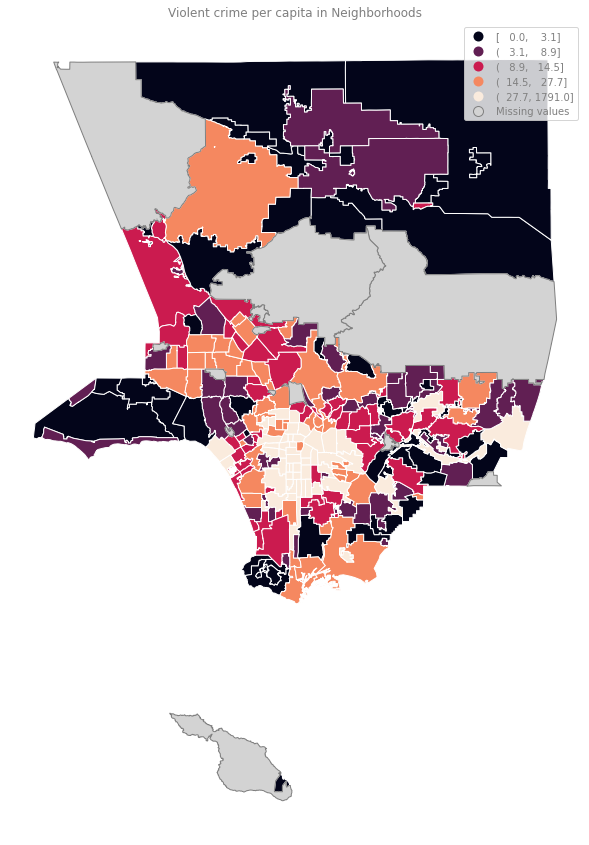

In [31]:
# Creating figure and axis
fig,ax = plt.subplots(1,1,figsize=((15,15)))
# Plotting onto axis
merged_df.plot("crime_fix",ax=ax,legend=True,scheme = "quantiles", legend_kwds={'fmt':'{:.01f}'},missing_kwds = {"color": "lightgrey",
        "edgecolor": "grey",
            "label": "Missing values"})

# Creating some layout 
plt.axis("off")
plt.title("Violent crime per capita in Neighborhoods")
plt.savefig("figure_9.svg")
plt.show()


In [32]:
# Merging data back to data_listing for ML model
crime_to_merge = merged_df[["neighborhood","crime_fix"]]
data_listing = data_listing.merge(crime_to_merge,how="left",on="neighborhood")

In [33]:
# Checking if the merge worked

data_listing.iloc[:,-3:]

,distance_disneyland,distance_rodeo_drive,crime_fix
0,4.83,6.12,49.10
1,20.95,10.17,36.25
2,18.98,9.47,10.60
3,18.98,9.47,10.60
4,5.13,5.83,49.10
...,...,...,...
15813,17.31,6.36,12.90
15814,14.20,23.35,9.50
15815,21.59,10.66,36.25
15816,26.11,36.52,5.85


## Calendar Data

### Checking if projected listings price can be used for the "real" price

Checking whether a full year of projected listings price can be used to approximate that actual listings price

In [34]:
#importing the calender data

cal_2017 = pd.read_csv("http://data.insideairbnb.com/united-states/ca/los-angeles/2017-03-02/data/calendar.csv.gz")
print(cal_2017.head(5))
print(cal_2017.info())


   listing_id        date available   price
0     8909380  2018-03-01         t  $50.00
1     8909380  2018-02-28         t  $50.00
2     8909380  2018-02-27         t  $50.00
3     8909380  2018-02-26         t  $50.00
4     8909380  2018-02-25         t  $50.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8530780 entries, 0 to 8530779
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   listing_id  int64 
 1   date        object
 2   available   object
 3   price       object
dtypes: int64(1), object(3)
memory usage: 260.3+ MB
None


In [35]:
# Importing calendar data from later that year
cal_2017_2 = pd.read_csv("http://data.insideairbnb.com/united-states/ca/los-angeles/2017-05-02/data/calendar.csv.gz")
cal_2017_2.head(5)

,listing_id,date,available,price
0,16228948,2018-03-25,t,"$3,000.00"
1,16228948,2018-03-24,t,"$3,000.00"
2,16228948,2018-03-23,t,"$3,000.00"
3,16228948,2018-03-22,t,"$3,000.00"
4,16228948,2018-03-21,t,"$3,000.00"


In [36]:
# Checking Avalibility
cal_2017_2.available.value_counts()

t    6231161
f    5177279
Name: available, dtype: int64

In [37]:
# Merging the two Df to be able to compare prices
cal_2017_2 = cal_2017_2.sort_values(ascending=True, by="listing_id")
cal_2017 = cal_2017.sort_values(ascending=True, by="listing_id")
cal_2017 = cal_2017.merge(right=cal_2017_2, how='inner', on=['date', 'listing_id'])
cal_2017.isna().sum()

listing_id           0
date                 0
available_x          0
price_x        2599381
available_y          0
price_y        2758420
dtype: int64

In [38]:
# Dropping NA
cal_2017.dropna(inplace=True)
cal_2017.price_y

304        $85.00
305        $85.00
306        $85.00
307        $85.00
308        $85.00
            ...  
6419510    $43.00
6419511    $43.00
6419512    $43.00
6419513    $43.00
6419514    $43.00
Name: price_y, Length: 3332266, dtype: object

In [39]:
# Formatting the price from string to float
cal_2017.price_y = cal_2017.price_y.str.replace(',','')
cal_2017.price_y = cal_2017.price_y.str.replace('$','')
cal_2017.price_y  = cal_2017.price_y.astype(float)
# Same for X price 
cal_2017.price_x = cal_2017.price_x.str.replace(',','')
cal_2017.price_x = cal_2017.price_x.str.replace('$','')
cal_2017.price_x  = cal_2017.price_x.astype(float)
# Creating difference columns
cal_2017['diff']= cal_2017['price_x']-cal_2017['price_y']
# Showing Mean of difference
cal_2017['diff'].mean()

-1.0844200312940204

In [40]:
cal_2017['diff'].value_counts(normalize=True).round(2)

 0.0       0.65
 1.0       0.02
-10.0      0.02
-1.0       0.02
-5.0       0.01
           ... 
 1310.0    0.00
 1303.0    0.00
 1301.0    0.00
 843.0     0.00
 656.0     0.00
Name: diff, Length: 1570, dtype: float64

Above shows that aprox 65% of the projected listingsprices did not change during the course of a year. Therefore the projected listingsprice in the beginning of the year can be used to project the actual listing price during the year.

### Looking at the listing price from 2016 to 2020

In [41]:
#importing the data

#2016 January 2nd
cal_2016 = pd.read_csv("http://data.insideairbnb.com/united-states/ca/los-angeles/2016-01-02/data/calendar.csv.gz")

#2016 August 3rd
cal_2016_2 = pd.read_csv("http://data.insideairbnb.com/united-states/ca/los-angeles/2016-08-03/data/calendar.csv.gz")

#2017 March 2nd
cal_2017 = pd.read_csv("http://data.insideairbnb.com/united-states/ca/los-angeles/2017-03-02/data/calendar.csv.gz")

#2018 March 7th
cal_2018= pd.read_csv("http://data.insideairbnb.com/united-states/ca/los-angeles/2018-03-07/data/calendar.csv.gz") 

#2019 March 6th
cal_2019= pd.read_csv("http://data.insideairbnb.com/united-states/ca/los-angeles/2019-03-06/data/calendar.csv.gz")


#2020 March 13th
cal_2020= pd.read_csv("http://data.insideairbnb.com/united-states/ca/los-angeles/2020-03-13/data/calendar.csv.gz")



In [42]:
#Defining a function for preprocessing of the different variabels

def preprocess (df):
  #changing price column value format
  df.price = df.price.str.replace(',','')
  df.price = df.price.str.replace('$','')
  df.price = df.price.astype(float)

  #dropping NaN values
  df.dropna(inplace=True)

  #making the data column values to datetime format and setting as index
  df['date']= pd.to_datetime(df.date)

  #setting date is index
  df.set_index('date', inplace= True)


  return df


In [43]:
#preprocessing all the dataframes
preprocess(cal_2016)
preprocess(cal_2016_2)
preprocess(cal_2017)
preprocess(cal_2018)
preprocess(cal_2019)
preprocess(cal_2020)

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights
date,,,,,,
2020-03-14,67672,f,95.0,$95.00,31,93
2020-03-14,22214,f,60.0,$60.00,7,730
2020-03-15,22214,f,60.0,$60.00,7,730
2020-03-16,22214,f,60.0,$60.00,7,730
2020-03-17,22214,f,60.0,$60.00,7,730
...,...,...,...,...,...,...
2021-03-09,42793903,t,33.0,$33.00,3,1125
2021-03-10,42793903,t,33.0,$33.00,3,1125
2021-03-11,42793903,t,33.0,$33.00,3,1125


In [44]:
cal_2016

,listing_id,available,price
date,,,
2016-01-02,444018,t,150.0
2016-01-03,444018,t,150.0
2016-01-04,444018,t,150.0
2016-01-05,444018,t,150.0
2016-01-06,444018,t,150.0
...,...,...,...
2016-12-27,9842250,t,105.0
2016-12-28,9842250,t,105.0
2016-12-29,9842250,t,105.0


In [45]:
#olnly keeping columns that are relevant
cal_2016 = cal_2016.iloc[:, 0:3]
cal_2016_2 = cal_2016_2.iloc[:, 0:3]
cal_2017 = cal_2017.iloc[:, 0:3]
cal_2018 = cal_2018.iloc[:, 0:3]
cal_2019 = cal_2019.iloc[:, 0:3]
cal_2020 = cal_2020.iloc[:, 0:3]

In [46]:
#Since the cal_2016 contains data for the full year of 2016, we only need the data for cal_2016_2 dataframe for January to March 2017, and date out of this range is therefore removed. 
cal_2016_2 = cal_2016_2.loc['2017-1-1':'2017-3-1']


#likewise,the dataframe for 2020 contains observations past October 31st 2020, which are therefore removed.
cal_2020 = cal_2020.loc[:'2020-10-31']



In [47]:
#adding all the dataframes to one data frame 
cal_total = cal_2017.append([cal_2016, cal_2016_2, cal_2018, cal_2019, cal_2020])
cal_total.sort_index(ascending=True)

,listing_id,available,price
date,,,
2016-01-02,444018,t,150.0
2016-01-02,4866756,t,98.0
2016-01-02,9059180,t,79.0
2016-01-02,8554860,t,249.0
2016-01-02,8792064,t,80.0
...,...,...,...
2020-10-31,27236677,f,109.0
2020-10-31,42531050,t,110.0
2020-10-31,27296284,f,54.0


In [48]:
#calculating a average listing price each week of the year
y_weekly = cal_total['price'].resample('W').median()

In [49]:
y_weekly

date
2016-01-03    106.0
2016-01-10    105.0
2016-01-17    104.0
2016-01-24    105.0
2016-01-31    105.0
              ...  
2020-10-04    110.0
2020-10-11    110.0
2020-10-18    110.0
2020-10-25    110.0
2020-11-01    110.0
Freq: W-SUN, Name: price, Length: 253, dtype: float64

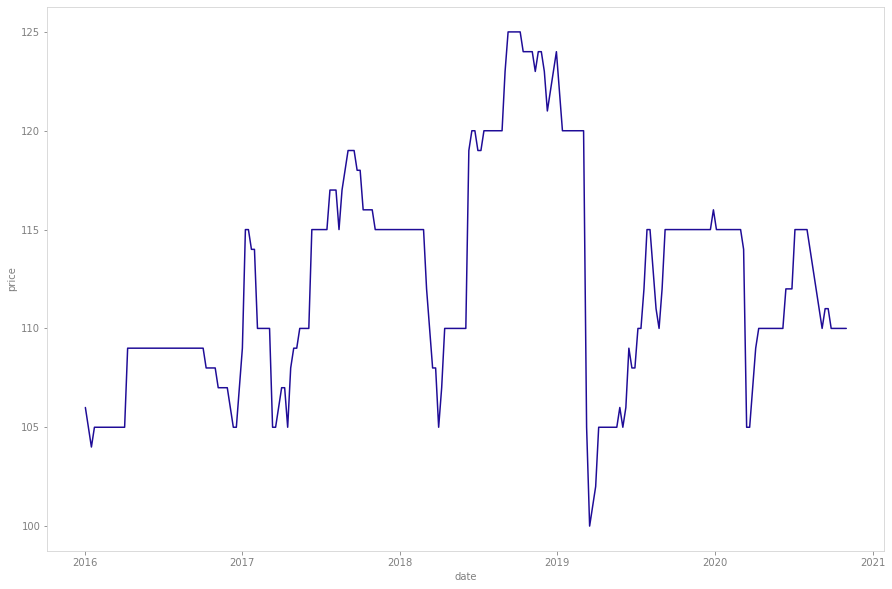

In [50]:
fig,ax = plt.subplots(figsize=(15,10))
sns.lineplot(x=y_weekly.index, y=y_weekly,ax=ax)
plt.savefig("figure_10.svg")

## Reviews Data

In [51]:
#importing the review data for 2020
reviews = pd.read_csv('http://data.insideairbnb.com/united-states/ca/los-angeles/2020-10-09/data/reviews.csv.gz')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075393 entries, 0 to 1075392
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1075393 non-null  int64 
 1   id             1075393 non-null  int64 
 2   date           1075393 non-null  object
 3   reviewer_id    1075393 non-null  int64 
 4   reviewer_name  1075391 non-null  object
 5   comments       1074402 non-null  object
dtypes: int64(3), object(3)
memory usage: 49.2+ MB


In [52]:
#displaying the dataframe
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...
2,2708,13994902,2014-06-09,10905424,Kuberan,i had a wonderful stay. Everything from start ...
3,2708,14606598,2014-06-23,2247288,Camilla,Charles is just amazing and he made my stay sp...
4,2708,39597339,2015-07-25,27974696,Fallon,Staying with Chas was an absolute pleasure. He...
...,...,...,...,...,...,...
1075388,45771078,702219540,2020-10-19,342079410,Stephanie,Place was nice and clean.
1075389,45774094,700470854,2020-10-14,95293856,Jose,Nothing good to said about her she was trying ...
1075390,45783050,700261428,2020-10-13,212256555,Amber,Excellent for single travelers or ppl waiting ...
1075391,45788897,673510229,2020-10-11,31227654,Rob,"Rod’s place was just amazing, super convenient..."


In [53]:
#changing the date column data type to datetime and setting as index
reviews['date']= pd.to_datetime(reviews.date)

#setting date is index
reviews.set_index('date', inplace= True)


In [54]:
reviews.head(3)

,listing_id,id,reviewer_id,reviewer_name,comments
date,,,,,
2011-08-15,109,449036,927861,Edwin,The host canceled my reservation the day befor...
2016-05-15,109,74506539,22509885,Jenn,Me and two friends stayed for four and a half ...
2014-06-09,2708,13994902,10905424,Kuberan,i had a wonderful stay. Everything from start ...


In [55]:
review_plot = pd.DataFrame(reviews.groupby('date').count())

In [56]:
review_plot_w = review_plot['listing_id'].resample('W').mean()  

In [57]:
review_plot_w

date
2009-05-31      1.000000
2009-06-07           NaN
2009-06-14           NaN
2009-06-21           NaN
2009-06-28           NaN
                 ...    
2020-09-27    668.000000
2020-10-04    619.428571
2020-10-11    431.142857
2020-10-18    216.285714
2020-10-25     85.666667
Freq: W-SUN, Name: listing_id, Length: 596, dtype: float64

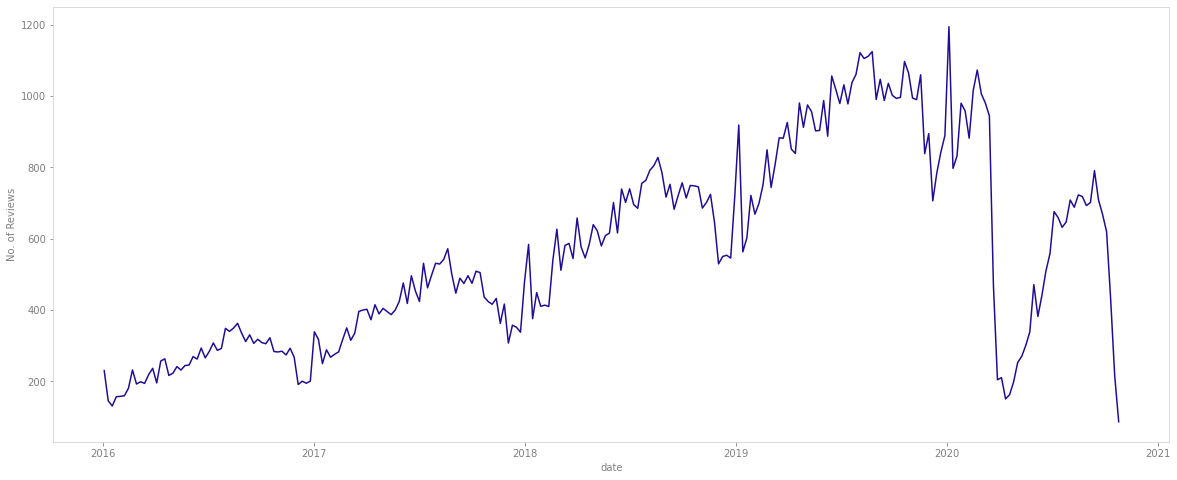

In [58]:
# Filtering for dates after 2016 for visulization purposes
review_plot_w_2016 = review_plot_w.loc["2016-01-01":]
fig,ax = plt.subplots(figsize=(20,8))
sns.lineplot(x=review_plot_w_2016.index, y=review_plot_w_2016,ax=ax)
plt.ylabel("No. of Reviews")
plt.savefig("figure_11.svg")
plt.show()

In [59]:
import plotly.express as px

fig = px.scatter(review_plot_w, x=review_plot_w.index, y='listing_id', trendline="lowess", labels={"x": "Date", "listing_id": "No. of reviews"})
fig.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# NLP

## Sentiment Analysis

In [60]:
#only looking at the reviews for 2019 and 2020
reviews_total =reviews
reviews = reviews.loc['2019-1-1':'2020-10-31'].sample(n=50000,random_state = 20)

In [61]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50000 entries, 2019-08-11 to 2019-05-21
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     50000 non-null  int64 
 1   id             50000 non-null  int64 
 2   reviewer_id    50000 non-null  int64 
 3   reviewer_name  50000 non-null  object
 4   comments       49942 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.3+ MB


In [62]:
reviews.comments.value_counts(dropna=False)

Great place!                                                                                                                                                                          90
Great place                                                                                                                                                                           81
Nice place                                                                                                                                                                            59
NaN                                                                                                                                                                                   58
Great stay                                                                                                                                                                            54
                                                                           

In [63]:
reviews = reviews[reviews.comments!="nan"]
reviews = reviews[reviews.comments!="."]


In [64]:
reviews.comments =reviews.comments.astype(str)

### Language Detection

In [65]:
#defining a function to detect language of review comment
!pip install langdetect
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 20

def detect_function (text):
  try: 
    language = detect(text)
    return language
  except:
    return "error"
  

     |████████████████████████████████| 983kB 5.0MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993195 sha256=69e700bbe3035cac8272b33a672f54261bc6d24f1ad0d460971059a47c700ad0
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [66]:
#applying the function to check the language of the different reivews
from tqdm.notebook import tqdm
tqdm.pandas()
reviews['language'] = reviews.progress_apply(lambda row: detect_function(row['comments']), axis=1)

reviews.head(3)


,listing_id,id,reviewer_id,reviewer_name,comments,language
date,,,,,,
2019-08-11,1453493,507635639,25029463,Tabatha,Susan was an absolutely gracious host. And the...,en
2019-03-23,12291609,427478922,15895866,Sean,Great little spot! Very nice host.,en
2019-06-16,29655011,470903326,13411502,Tim,Tobias was great. Very accommodating and respo...,en


In [67]:
#Checking the different languages used for the review comment
reviews.language.value_counts(normalize=True)

en       0.929920
fr       0.011070
es       0.009768
zh-cn    0.008527
ko       0.006746
ro       0.006626
de       0.005305
tl       0.002362
af       0.002162
so       0.002102
pt       0.001922
it       0.001681
ja       0.001541
ca       0.001321
cs       0.001141
nl       0.001081
ru       0.000901
no       0.000761
error    0.000741
pl       0.000580
sw       0.000560
sv       0.000480
hu       0.000320
da       0.000280
vi       0.000260
cy       0.000260
sk       0.000240
id       0.000220
zh-tw    0.000220
hr       0.000220
et       0.000160
sl       0.000160
fi       0.000140
tr       0.000080
ar       0.000040
he       0.000040
uk       0.000020
lv       0.000020
ur       0.000020
Name: language, dtype: float64

In [68]:
reviews = reviews[reviews.language=="en"]
reviews.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46456 entries, 2019-08-11 to 2019-05-21
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     46456 non-null  int64 
 1   id             46456 non-null  int64 
 2   reviewer_id    46456 non-null  int64 
 3   reviewer_name  46456 non-null  object
 4   comments       46456 non-null  object
 5   language       46456 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.5+ MB


### Vader Sentiment

In [69]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

     |████████████████████████████████| 133kB 4.9MB/s 


In [70]:
reviews['sentiment_score'] = reviews.progress_apply(lambda row: sentiment.polarity_scores(row['comments'])["compound"], axis=1)

In [71]:
reviews.sentiment_score

date
2019-08-11    0.9326
2019-03-23    0.8032
2019-06-16    0.9321
2019-10-26    0.4854
2020-06-29    0.6249
               ...  
2019-11-11    0.8588
2019-08-05    0.9259
2020-09-25    0.9625
2020-08-25    0.9750
2019-05-21    0.7650
Name: sentiment_score, Length: 46456, dtype: float64

In [72]:
reviews.sentiment_score.mean()

0.8070213234028054

In [73]:
def sentiment_classification (text):
  if (text > 0.05): 
    return "Positive"

  elif ((text <= 0.05) and (text>=-0.05)): 
    return "Neutral"

  else:
    return "Negative"

In [74]:
reviews['sentiment'] = reviews.apply(lambda row: sentiment_classification(row['sentiment_score']), axis=1)
reviews.head()


,listing_id,id,reviewer_id,reviewer_name,comments,language,sentiment_score,sentiment
date,,,,,,,,
2019-08-11,1453493,507635639,25029463,Tabatha,Susan was an absolutely gracious host. And the...,en,0.9326,Positive
2019-03-23,12291609,427478922,15895866,Sean,Great little spot! Very nice host.,en,0.8032,Positive
2019-06-16,29655011,470903326,13411502,Tim,Tobias was great. Very accommodating and respo...,en,0.9321,Positive
2019-10-26,35710491,554646187,187368320,Wendy,If you want a place to lay your head and take ...,en,0.4854,Positive
2020-06-29,33360285,633392576,350557264,Maria,Great.,en,0.6249,Positive


In [75]:
reviews.sentiment.value_counts(normalize=True)

Positive    0.963406
Neutral     0.018727
Negative    0.017866
Name: sentiment, dtype: float64

In [76]:
#seperating the data into positive reviews and negative reviews based on the identified sentiment

reviews_pos = reviews[reviews.sentiment=="Positive"]
reviews_neg = reviews[reviews.sentiment=="Negative"]


In [77]:
reviews_neg.sentiment.value_counts()

Negative    830
Name: sentiment, dtype: int64

In [78]:
reviews_pos.sentiment.value_counts()

Positive    44756
Name: sentiment, dtype: int64

## Tokenization

In [79]:
#importing spacy package
import spacy
nlp = spacy.load("en")

In [80]:
#total number of stopwords and examples of stopwords
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

#Printing first ten stop words:
print( list(spacy_stopwords)[:20])

['seem', 'across', 'done', 'with', 'himself', 'never', 'where', 'regarding', 'also', '‘s', 'wherever', "'d", "'s", 'whereupon', 'nowhere', 'nor', 'behind', 'really', 'say', '’d']


In [81]:
# applying lexicon normalization, keeping words that are of specific word classes and are not stopwords from our tokenized words column token
from spacy.lang.en.stop_words import STOP_WORDS
from tqdm.notebook import tqdm
tqdm.pandas()

tokens = []

for word in tqdm(nlp.pipe(reviews['comments'], disable=['parser'],batch_size=128),total=len(reviews.comments)):
  proj_tok = [token.lemma_.lower() for token in word if token.pos_ in ['NOUN', 'ADV', 'VERB', 'PROPN'] and not token.is_stop and token.ent_type_!='PERSON' ]
  tokens.append(proj_tok)

reviews['tokenized'] = tokens

## Word Cloud

Generating a wordcloud with the most common words and plotting on a key 

In [82]:
reviews.head()

,listing_id,id,reviewer_id,reviewer_name,comments,language,sentiment_score,sentiment,tokenized
date,,,,,,,,,
2019-08-11,1453493,507635639,25029463,Tabatha,Susan was an absolutely gracious host. And the...,en,0.9326,Positive,"[absolutely, host, casita, person, couple, exp..."
2019-03-23,12291609,427478922,15895866,Sean,Great little spot! Very nice host.,en,0.8032,Positive,"[spot, host]"
2019-06-16,29655011,470903326,13411502,Tim,Tobias was great. Very accommodating and respo...,en,0.9321,Positive,"[place, check, wolf, rescue, near, think, call..."
2019-10-26,35710491,554646187,187368320,Wendy,If you want a place to lay your head and take ...,en,0.4854,Positive,"[want, place, lay, head, shower, hang]"
2020-06-29,33360285,633392576,350557264,Maria,Great.,en,0.6249,Positive,[]


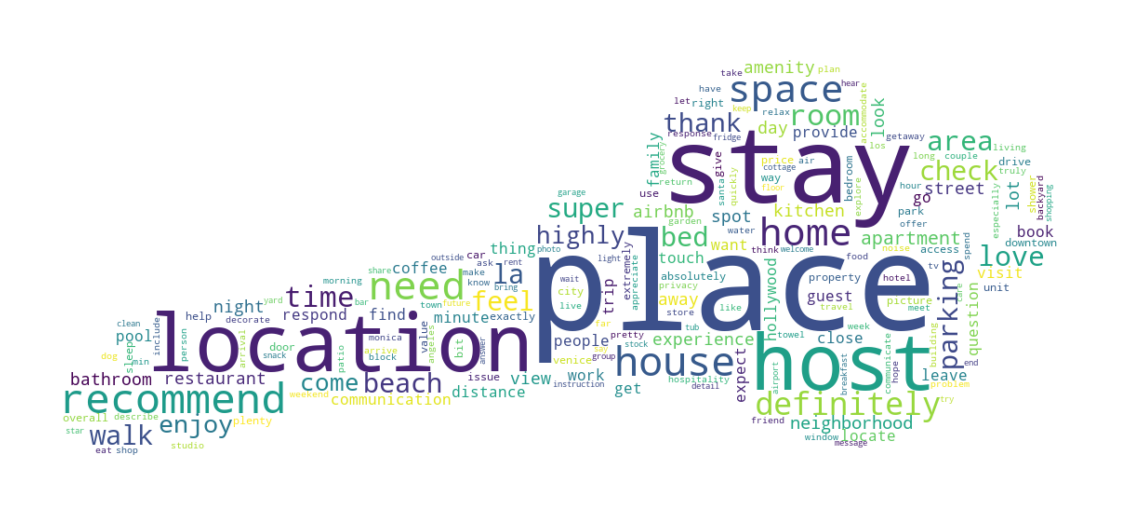

In [83]:
import itertools
from collections import Counter
from wordcloud import WordCloud
from PIL import Image

#Downloading picture from github
! wget -q https://github.com/fc0712/DSBA-project-Airbnb_LA/raw/master/data/key_new.jpg
# Opening picture
key_mask = np.array(Image.open("/content/key_new.jpg"))


# Creating Word Cloud object
world_cloud = WordCloud(mask=key_mask, background_color="white",
               max_words=200, max_font_size=256,
               random_state=42, width=key_mask.shape[1],
               height=key_mask.shape[0],)

# Creating word frequiencies using Counter
world_cloud.generate_from_frequencies(Counter(itertools.chain(*reviews["tokenized"])))


# Display the generated image:
fig,ax = plt.subplots(figsize=(20,20))
ax.imshow(world_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("figure_12.svg")
plt.show()





## Topic modelling

### Preprocessing

In [84]:
# Import the gensim dictionary builder 
!pip install --upgrade gensim
from gensim.corpora.dictionary import Dictionary


     |████████████████████████████████| 24.2MB 2.2MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [85]:
reviews_pos = reviews[reviews.sentiment=="Positive"]
reviews_neg = reviews[reviews.sentiment=="Negative"]

In [86]:
#creating a dictionary for both positive and negative reviews and filtering out extremes
dictionary_pos = Dictionary(reviews_pos['tokenized'])
dictionary_pos.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

dictionary_neg = Dictionary(reviews_neg['tokenized'])
dictionary_neg.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)


In [87]:
#creating a corpus based on the dictionary created above
corpus_pos = [dictionary_pos.doc2bow(word) for word in reviews_pos['tokenized']]

corpus_neg = [dictionary_neg.doc2bow(word) for word in reviews_neg['tokenized']]

### LDA Model

In [88]:
#running a LDA model
from gensim.models import LdaMulticore
lda_model_pos = LdaMulticore(corpus_pos, id2word=dictionary_pos, num_topics=5, workers = 4, passes=10, random_state = 20)
lda_model_neg = LdaMulticore(corpus_neg, id2word=dictionary_neg, num_topics=5, workers = 4, passes=10, random_state = 20)

In [89]:
len(dictionary_pos)

1000

In [90]:
# Check out topics
lda_model_pos.print_topics(-1)

[(0,
  '0.022*"stay" + 0.021*"place" + 0.020*"room" + 0.015*"night" + 0.014*"check" + 0.013*"parking" + 0.011*"house" + 0.011*"time" + 0.011*"day" + 0.011*"need"'),
 (1,
  '0.136*"place" + 0.098*"stay" + 0.062*"location" + 0.057*"recommend" + 0.057*"host" + 0.030*"definitely" + 0.029*"highly" + 0.025*"check" + 0.021*"need" + 0.019*"super"'),
 (2,
  '0.035*"room" + 0.033*"bed" + 0.032*"space" + 0.030*"house" + 0.021*"kitchen" + 0.017*"stay" + 0.016*"place" + 0.016*"bathroom" + 0.014*"area" + 0.013*"need"'),
 (3,
  '0.053*"beach" + 0.047*"walk" + 0.040*"location" + 0.038*"place" + 0.029*"restaurant" + 0.020*"stay" + 0.020*"parking" + 0.019*"distance" + 0.015*"away" + 0.015*"close"'),
 (4,
  '0.085*"stay" + 0.051*"home" + 0.048*"place" + 0.032*"host" + 0.031*"love" + 0.026*"feel" + 0.025*"thank" + 0.024*"definitely" + 0.024*"house" + 0.021*"time"')]

In [91]:
# Check out topics
lda_model_neg.print_topics(-1)

[(0,
  '0.032*"place" + 0.027*"apartment" + 0.020*"parking" + 0.013*"need" + 0.012*"unit" + 0.011*"location" + 0.011*"stay" + 0.011*"airbnb" + 0.011*"street" + 0.010*"check"'),
 (1,
  '0.026*"stay" + 0.017*"place" + 0.016*"get" + 0.016*"room" + 0.015*"leave" + 0.015*"day" + 0.014*"host" + 0.013*"check" + 0.013*"night" + 0.013*"tell"'),
 (2,
  '0.033*"stay" + 0.028*"house" + 0.018*"property" + 0.017*"host" + 0.015*"guest" + 0.014*"air" + 0.014*"airbnb" + 0.011*"time" + 0.010*"issue" + 0.009*"experience"'),
 (3,
  '0.033*"room" + 0.022*"stay" + 0.021*"bed" + 0.020*"house" + 0.016*"shower" + 0.015*"place" + 0.014*"door" + 0.011*"smell" + 0.011*"come" + 0.009*"leave"'),
 (4,
  '0.054*"place" + 0.038*"host" + 0.028*"stay" + 0.018*"location" + 0.014*"bathroom" + 0.013*"apartment" + 0.013*"night" + 0.012*"time" + 0.012*"picture" + 0.011*"look"')]

### PyLDAvis for Plotting Topics

In [92]:
# importing PyLDAvis for plotting
!pip install -qq pyLDAvis
import pyLDAvis.gensim
%matplotlib inline
pyLDAvis.enable_notebook()

     |████████████████████████████████| 1.6MB 6.8MB/s 


In [93]:
#plotting the topics
lda_plot_pos = pyLDAvis.gensim.prepare(lda_model_pos, corpus_pos, dictionary_pos)


In [94]:
#plotting the positive topics
pyLDAvis.display(lda_plot_pos)

In [95]:
#plotting the topics
lda_plot_neg = pyLDAvis.gensim.prepare(lda_model_neg, corpus_neg, dictionary_neg)

In [96]:
pyLDAvis.display(lda_plot_neg, )

## Sentiment score for Machine Learning

This part required to tokenize all the reviews over 1 mio reviews and due to the strict idle times of Google Colab the following code is run locally and exported to a csv, which is then merged onto the data listing dataframe

The local code is avalaible on the Gihub page. Here is the link: 

https://github.com/fc0712/DSBA-project-Airbnb_LA/blob/master/Reviews_sent_offline.py

The code that was used is also pasted here for ease of use formatted as markdown



```
import pandas as pd
reviews = pd.read_csv('http://data.insideairbnb.com/united-states/ca/los-angeles/2020-10-09/data/reviews.csv.gz')

#changing the date column data type to datetime and setting as index
reviews['date']= pd.to_datetime(reviews.date)

#setting date is index
reviews.set_index('date', inplace= True)

reviews_total = reviews

data_eda = pd.read_csv('airbnb_cleaned.csv')

unique_ids = data_eda.id.unique().tolist()
len(unique_ids)

reviews_total = reviews_total[reviews_total.comments!="nan"]
reviews_total = reviews_total[reviews_total.comments!="."]

reviews_total.comments =reviews_total.comments.astype(str)

reviews_total[reviews_total.listing_id.isin(unique_ids)]

#applying the function to check the language of the different reivews
from tqdm import tqdm
tqdm.pandas()

from langdetect import detect

def detect_function (text):
  try: 
    language = detect(text)
    return language
  except:
    return "error"


reviews_total['language'] = reviews_total.progress_apply(lambda row: detect_function(row['comments']), axis=1)

reviews_total = reviews_total[reviews_total.language=="en"]

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

reviews_total['sentiment_score'] = reviews_total.progress_apply(lambda row: sentiment.polarity_scores(row['comments'])["compound"], axis=1)

reviews_total.to_csv("sentiment.csv")

sentiment_df = reviews_total.copy()


#Calculating the average sentiment score per listing id
review_id_sentiment_score = pd.DataFrame(sentiment_df.groupby('listing_id')['sentiment_score'].mean())
data_eda = data_eda.merge(review_id_sentiment_score,left_on="id", right_on="listing_id", how='left')
data_eda[['id', 'sentiment_score']].to_csv('sentiment_score_ML.csv', index_label="index")


```




In [97]:
# Merging onto Data Listing
temp_merge = pd.read_csv("https://raw.githubusercontent.com/fc0712/DSBA-project-Airbnb_LA/master/data/sentiment_score_ML.csv",index_col="index")
temp_merge.head()

,id,sentiment_score
index,,
0,2708,0.919938
1,2732,0.962790
2,5729,0.828479
3,5843,0.793987
4,6931,0.881181


In [98]:
# Merging 

data_listing = data_listing.merge(temp_merge,how="left",on="id")
data_listing.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathroom_type,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,...,Outlet covers,Oven,Pack \u2019n Play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Pets allowed,Pocket wifi,Pool,Portable fans,Private entrance,Private living room,Refrigerator,Rice Maker,Room-darkening shades,Self check-in,Shampoo,Shower gel,Single level home,Smart lock,Smoke alarm,Stair gates,Stove,TV,Washer,Waterfront,Wifi,Window guards,price_per_room,landlord_type,distance_santa_monica,distance_hollywood_walk,distance_getty_center,distance_venice_beach,distance_griffith,distance_uni_studios,distance_disneyland,distance_rodeo_drive,crime_fix,sentiment_score
0,2708,https://www.airbnb.com/rooms/2708,20201009145904,2020-10-10,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,Beautiful Furnished Mirror Mini-Suite w/ Firep...,We are minutes away from the Mentor Language I...,https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within a few hours,100%,100%,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,Hollywood,City of Los Angeles,34.09768,-118.34602,private room,Private room,1,1.5,bath,1.0,1.0,"""Bed linens"", ""Essentials"", ""Patio or balcony""...",75.0,30,366,...,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,75.0,Private,16.91,1.80,11.99,17.01,4.83,4.83,4.83,6.12,49.10,0.919938
1,2732,https://www.airbnb.com/rooms/2732,20201009145904,2020-10-18,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,Yoga Priestess,2008-09-17,"Santa Monica, California, United States",I have been teaching yoga and meditation for 3...,within an hour,92%,50%,f,https://a0.muscache.com/im/users/3041/profile_...,https://a0.muscache.com/im/users/3041/profile_...,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Santa Monica,Other Cities,34.00475,-118.48127,private room,Private room,1,1.0,private bath,1.0,1.0,"""Hangers"", ""Refrigerator"", ""Dishes and silverw...",155.0,1,180,...,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,155.0,Private,1.48,17.83,8.17,2.07,20.95,20.95,20.95,10.17,36.25,0.962790
2,5729,https://www.airbnb.com/rooms/5729,20201009145904,2020-10-25,Zen Room with Floating Bed near Venice and LAX,Our home is located near Venice Beach without ...,Our neighborhood is very quiet and save. There...,https://a0.muscache.com/pictures/f48e3ea8-2075...,9171,https://www.airbnb.com/users/show/9171,Sanni,2009-03-05,"Los Angeles, California, United States",we are loving our home and would like to share...,within a few hours,89%,94%,t,https://a0.muscache.com/im/pictures/user/99373...,https://a0.muscache.com/im/pictures/user/99373...,8.0,8.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,Del Rey,City of Los Angeles,33.98750,-118.43200,private room,Private room,3,1.0,shared bath,1.0,1.0,"""Shampoo"", ""Fire extinguisher"", ""Washer"", ""Mic...",70.0,30,1125,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,70.0,Private,6.41,15.96,10.78,3.85,18.98,18.98,18.98,9.47,10.60,0.828479
3,5843,https://www.airbnb.com/rooms/5843,20201009145904,2020-10-11,Artist Oasis near Venice Beach w/ Beautiful Ga...,Do 

# ML

## Preprocessing

In [99]:
# Setting Random_seed for reproducibility
random_seed = 20


### Creating Pricing Category

In [100]:
# Creating pricing category to eliminate all the Neighborhood dummys
neigh_price = pd.DataFrame(data_listing.groupby('neighborhood')['price_per_room'].mean().sort_values(ascending=False))
#checking the quantiles for price per room
neigh_quantiles = neigh_price.quantile([0.2, 0.4, 0.60, 0.8, 1])
print(neigh_quantiles)
print(neigh_price)

# Creating Function to assign qunatiles to ordinal number
def price_category_neighborhood (text):
  if (text <= neigh_quantiles.iloc[0,0]): 
    return 1

  elif ((text > neigh_quantiles.iloc[0,0]) and (text <=neigh_quantiles.iloc[1,0])): 
    return 2

  elif ((text > neigh_quantiles.iloc[1,0]) and (text <=neigh_quantiles.iloc[2,0])): 
    return 3

  elif ((text > neigh_quantiles.iloc[2,0]) and (text <=neigh_quantiles.iloc[3,0])): 
    return 4

  elif (text > neigh_quantiles.iloc[3,0]):
    return 5
    

# Applying function
neigh_price['price_category_neighborhood']= neigh_price.apply(lambda row: price_category_neighborhood(row['price_per_room']), axis=1)

# Merging
print(neigh_price.price_category_neighborhood.value_counts())
neigh_price= neigh_price[['price_category_neighborhood']]
print(neigh_price)
data_listing = data_listing.merge(neigh_price,on="neighborhood", how='left')



     price_per_room
0.2       68.849623
0.4       79.213002
0.6       96.260923
0.8      107.336195
1.0      267.361995
                                       price_per_room
neighborhood                                         
Malibu                                     267.361995
Avalon                                     210.306333
Unincorporated Santa Monica Mountains      178.174810
Marina del Rey                             152.451389
Topanga                                    151.813209
...                                               ...
West Covina                                 56.899383
Hacienda Heights                            56.643031
Temple City                                 53.125000
Lancaster                                   50.111111
Palmdale                                    47.765766

[127 rows x 1 columns]
5    26
1    26
4    25
3    25
2    25
Name: price_category_neighborhood, dtype: int64
                                       price_category_neighborhood

In [101]:
data_listing.price_category_neighborhood.value_counts()

5    5053
3    3762
4    3697
2    1688
1    1618
Name: price_category_neighborhood, dtype: int64

In [102]:
# showing diffrent column names and number
i = -1
for column in data_listing.columns:
  i+=1
  print(f'{i}: {column}')

0: id
1: listing_url
2: scrape_id
3: last_scraped
4: name
5: description
6: neighborhood_overview
7: picture_url
8: host_id
9: host_url
10: host_name
11: host_since
12: host_location
13: host_about
14: host_response_time
15: host_response_rate
16: host_acceptance_rate
17: host_is_superhost
18: host_thumbnail_url
19: host_picture_url
20: host_listings_count
21: host_total_listings_count
22: host_verifications
23: host_has_profile_pic
24: host_identity_verified
25: neighborhood
26: neighbourhood_group_cleansed
27: latitude
28: longitude
29: property_type
30: room_type
31: accommodates
32: bathrooms
33: bathroom_type
34: bedrooms
35: beds
36: amenities
37: price
38: minimum_nights
39: maximum_nights
40: minimum_minimum_nights
41: maximum_minimum_nights
42: minimum_maximum_nights
43: maximum_maximum_nights
44: minimum_nights_avg_ntm
45: maximum_nights_avg_ntm
46: has_availability
47: availability_30
48: availability_60
49: availability_90
50: availability_365
51: calendar_last_scraped
52: 

### Selecting Features

In [103]:
# Choosing the columns for the model using numpy r_ function
data_ml = data_listing.iloc[:,np.r_[17,27:36,37,38:40,47:51,65,70:176]]
data_ml_new_host = data_listing.iloc[:,np.r_[17,27:36,37,38:40,47:51,65,70:174,175]]

In [104]:
# Testing np.r_ function when choosing columns
data_listing.iloc[:,np.r_[70:174,175]]

,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Barbecue utensils,Bathroom essentials,Bathtub,Beach essentials,Beachfront,Bed linens,Bedroom comforts,Body soap,Bread maker,Breakfast,Building staff,Cable TV,Carbon monoxide alarm,Ceiling fan,Changing table,Children\u2019s books and toys,Children\u2019s dinnerware,Cleaning before checkout,Coffee maker,Conditioner,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,Fireplace guards,First aid kit,Free parking on premises,...,Outlet covers,Oven,Pack \u2019n Play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Pets allowed,Pocket wifi,Pool,Portable fans,Private entrance,Private living room,Refrigerator,Rice Maker,Room-darkening shades,Self check-in,Shampoo,Shower gel,Single level home,Smart lock,Smoke alarm,Stair gates,Stove,TV,Washer,Waterfront,Wifi,Window guards,price_per_room,landlord_type,distance_santa_monica,distance_hollywood_walk,distance_getty_center,distance_venice_beach,distance_griffith,distance_uni_studios,distance_disneyland,distance_rodeo_drive,crime_fix,price_category_neighborhood
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,1,1,0,1,1,...,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,75.0,Private,16.91,1.80,11.99,17.01,4.83,4.83,4.83,6.12,49.10,4
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,155.0,Private,1.48,17.83,8.17,2.07,20.95,20.95,20.95,10.17,36.25,5
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,70.0,Private,6.41,15.96,10.78,3.85,18.98,18.98,18.98,9.47,10.60,4
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,67.5,Private,6.41,15.96,10.78,3.85,18.98,18.98,18.98,9.47,10.60,4
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,1,1,1,0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,73.0,Private,16.60,2.06,11.77,16.69,5.13,5.13,5.13,5.83,49.10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15813,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,60.0,Private,4.49,14.21,4.62,5.76,17.31,17.31,17.31,6.36,12.90,4
15814,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,70.0,Private,32.98,16.34,29.83,31.81,14.20,14.20,14.20,23.35,9.50,1
15815,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,175.0,Business,0.42,18.48,7.46,3.65,21.59,21.59,21.59,10.66,36.25,5
15816,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,0,1,0,0,1,0,83.0,Private,46.68,28.89,42.68,45.72,26.11,26.11,26.11,36.52,5.85,1


In [105]:
# Creating X and y  - Existings Hosts
X = data_ml.drop(["price","price_per_room"],axis=1)
y = data_ml["price"]

# Creating X and Y - New hosts
X_new = data_ml_new_host.drop(["price","price_per_room"],axis=1)
y_new =data_ml_new_host["price"]

# Non Scaled Data:
X_nonscaled = data_ml.drop(["price","price_per_room"],axis=1)
y_nonscaled =data_ml["price"]

X_new_nonscaled = data_ml_new_host.drop(["price","price_per_room"],axis=1)
y_new_nonscaled =data_ml_new_host["price"]



### Dummy Encoding

In [106]:
# Creating Dummies for existing and new hosts
X = pd.get_dummies(X)
X_new  =pd.get_dummies(X_new)
X_nonscaled = pd.get_dummies(X_nonscaled)
X_new_nonscaled = pd.get_dummies(X_new_nonscaled)



### Train Test split

In [107]:
# Splitting training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=random_seed)

# New hosts
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.25,random_state=random_seed)

# non scaled
X_train_new_nonscaled, X_test_new_nonscaled, y_train_new_nonscaled, y_test_new_nonscaled = train_test_split(X_new_nonscaled, y_new_nonscaled, test_size=0.25,random_state=random_seed)
X_train_nonscaled, X_test_nonscaled, y_train_nonscaled, y_test_nonscaled = train_test_split(X_nonscaled, y_nonscaled, test_size=0.25,random_state=random_seed)



In [108]:
# Checking which columns to scale
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11863 entries, 935 to 15715
Data columns (total 148 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   latitude                                 float64
 1   longitude                                float64
 2   accommodates                             int64  
 3   bathrooms                                float64
 4   bedrooms                                 float64
 5   beds                                     float64
 6   minimum_nights                           int64  
 7   maximum_nights                           int64  
 8   availability_30                          int64  
 9   availability_60                          int64  
 10  availability_90                          int64  
 11  availability_365                         int64  
 12  calculated_host_listings_count           int64  
 13  Air conditioning                         int64  
 14  BBQ grill          

### Scaling

In [109]:
# Scaling numerical feauture
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_new = StandardScaler()
# Defining the columns to scale(standardizing)
columns_scale = ["accommodates","bathrooms","bedrooms","beds","sentiment_score","latitude","longitude","minimum_nights"	,"maximum_nights",	"availability_30",	"availability_60",
                 "availability_90",	"availability_365",	"calculated_host_listings_count",
                 "distance_santa_monica",	"distance_hollywood_walk",	"distance_getty_center",	"distance_venice_beach",	"distance_griffith",	"distance_uni_studios",	"distance_disneyland",	"distance_rodeo_drive","price_category_neighborhood","crime_fix"]  


columns_scale_new_host =["accommodates","bathrooms","bedrooms","beds","latitude","longitude","minimum_nights"	,"maximum_nights",	"availability_30",	"availability_60",
                 "availability_90",	"availability_365",	"calculated_host_listings_count",
                 "distance_santa_monica",	"distance_hollywood_walk",	"distance_getty_center",	"distance_venice_beach",	"distance_griffith",	"distance_uni_studios",	"distance_disneyland",	"distance_rodeo_drive","price_category_neighborhood","crime_fix"] 
# Fit and transforming on the training set
X_train[columns_scale] = scaler.fit_transform(X_train[columns_scale])

# Only transorming on test data to prevent data lekeage 
X_test[columns_scale] = scaler.transform(X_test[columns_scale])

# Now for new hosts
X_train_new[columns_scale_new_host] = scaler_new.fit_transform(X_train_new[columns_scale_new_host])
X_test_new[columns_scale_new_host] = scaler_new.transform(X_test_new[columns_scale_new_host])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [110]:
X_train_nonscaled.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11863 entries, 935 to 15715
Data columns (total 148 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   latitude                                 float64
 1   longitude                                float64
 2   accommodates                             int64  
 3   bathrooms                                float64
 4   bedrooms                                 float64
 5   beds                                     float64
 6   minimum_nights                           int64  
 7   maximum_nights                           int64  
 8   availability_30                          int64  
 9   availability_60                          int64  
 10  availability_90                          int64  
 11  availability_365                         int64  
 12  calculated_host_listings_count           int64  
 13  Air conditioning                         int64  
 14  BBQ grill          

### Dtype optimization

In [111]:
# Converting Categorical columns to Categorical dtype
X_train[X_train.select_dtypes(exclude="float64").columns] = X_train.select_dtypes(exclude="float64").astype("category")
X_test[X_test.select_dtypes(exclude="float64").columns] = X_test.select_dtypes( exclude="float64").astype("category")

# New hosts 
X_train_new[X_train_new.select_dtypes(exclude="float64").columns] = X_train_new.select_dtypes(exclude="float64").astype("category")
X_test_new[X_test_new.select_dtypes(exclude="float64").columns] = X_test_new.select_dtypes( exclude="float64").astype("category")

 # new nonscaled
X_train_new_nonscaled.iloc[:,np.r_[13:106,116:147]] = X_train_new_nonscaled.iloc[:,np.r_[13:106,116:147]].astype("category")
X_test_new_nonscaled.iloc[:,np.r_[13:106,116:147]] =X_test_new_nonscaled.iloc[:,np.r_[13:106,116:147]].astype("category")

# nonscaled
X_train_nonscaled.iloc[:,np.r_[13:106,117:148]] = X_train_nonscaled.iloc[:,np.r_[13:106,117:148]].astype("category")
X_test_nonscaled.iloc[:,np.r_[13:106,117:148]] =X_test_nonscaled.iloc[:,np.r_[13:106,117:148]].astype("category")


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [112]:
# Checking if categorical columns is dtype "category"
X_train_new_nonscaled.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11863 entries, 935 to 15715
Data columns (total 147 columns):
 #   Column                                   Dtype   
---  ------                                   -----   
 0   latitude                                 float64 
 1   longitude                                float64 
 2   accommodates                             int64   
 3   bathrooms                                float64 
 4   bedrooms                                 float64 
 5   beds                                     float64 
 6   minimum_nights                           int64   
 7   maximum_nights                           int64   
 8   availability_30                          int64   
 9   availability_60                          int64   
 10  availability_90                          int64   
 11  availability_365                         int64   
 12  calculated_host_listings_count           int64   
 13  Air conditioning                         category
 14  BBQ

## Running diffrent models (Cross validation)

In [113]:
# Importing Models and packages
! pip install catboost --quiet
from catboost import CatBoostRegressor
! pip install lightgbm --quiet
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import time

# Creating list that contains names of categorical columns
cat_colum_names_new  = X_train_new.select_dtypes("category").columns.tolist()
cat_colum_names  = X_train.select_dtypes("category").columns.tolist()
cat_indicies_new = [X_train_new.columns.get_loc(col) for col in cat_colum_names_new]
cat_indicies  = [X_train.columns.get_loc(col) for col in cat_colum_names]

cat_colum_names_new_nonscaled  = X_train_new_nonscaled.select_dtypes("category").columns.tolist()
cat_colum_names_nonscaled  = X_train_nonscaled.select_dtypes("category").columns.tolist()
cat_indicies_new_nonscaled = [X_train_new_nonscaled.columns.get_loc(col) for col in cat_colum_names_new]
cat_indicies_nonscaled  = [X_train_nonscaled.columns.get_loc(col) for col in cat_colum_names]


# Creating Dictionary with ML models

ML_model = {}
ML_model["CatB"] = CatBoostRegressor(random_state=random_seed,cat_features=cat_indicies,verbose=False)
ML_model["LGBM"] = LGBMRegressor(random_state=random_seed)
ML_model["LR"] = LinearRegression()
ML_model["RF"] = RandomForestRegressor(random_state=random_seed)

ML_model_new = {}
ML_model_new["CatB"] = CatBoostRegressor(random_state=random_seed,cat_features=cat_indicies_new,verbose=False)
ML_model_new["LGBM"] = LGBMRegressor(random_state=random_seed)
ML_model_new["LR"] = LinearRegression()
ML_model_new["RF"] = RandomForestRegressor(random_state=random_seed)


k_fold = 5
# dictionary for results
cross_val_result = {}
model_running_time = {}
cross_val_result_new = {}
model_running_time_new = {}
# lists to loop through
model_list = ["LGBM","CatB","LR","RF"]
model_list_new = ["LGBM","CatB","LR","RF"]

# loops existing
for model in model_list:
  start=time.monotonic()
  print(f'Started Training the {model}')
  if (model =="LGBM" or model =="CatB" or model =="RF" ):
    cross_val_result[model] = np.mean(cross_val_score(ML_model[model],X_train_nonscaled,y_train_nonscaled,cv=k_fold))
  else: 
    cross_val_result[model] = np.mean(cross_val_score(ML_model[model],X_train,y_train,cv=k_fold))


  end = time.monotonic()
  model_running_time[model] =end-start
  print(f'The model took {round(end-start,2)} seconds')

# loops new
for model_new in model_list_new:
  start_new=time.monotonic()
  print(f'Started Training the {model_new}')
  if (model =="LGBM" or model =="CatB" or model =="RF" ):
    cross_val_result_new[model_new] = np.mean(cross_val_score(ML_model_new[model_new],X_train_new_nonscaled,y_train_new_nonscaled,cv=k_fold))
  else: 
    cross_val_result_new[model_new] = np.mean(cross_val_score(ML_model_new[model_new],X_train_new,y_train_new,cv=k_fold))

  end_new = time.monotonic()
  model_running_time_new[model_new] =end_new-start_new
  print(f'The model took {round(end_new-start_new,2)} seconds')




     |████████████████████████████████| 66.3MB 138kB/s 
Started Training the LGBM
The model took 5.82 seconds
Started Training the CatB
The model took 58.2 seconds
Started Training the LR
The model took 1.19 seconds
Started Training the RF
The model took 143.3 seconds
Started Training the LGBM
The model took 5.71 seconds
Started Training the CatB
The model took 56.34 seconds
Started Training the LR
The model took 1.17 seconds
Started Training the RF
The model took 138.64 seconds


**Figure - R2 and Running time**

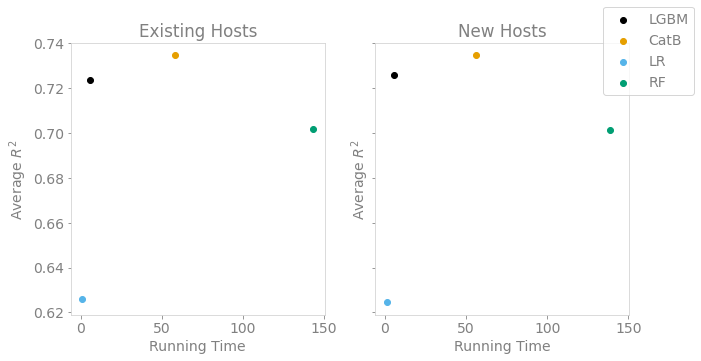

In [114]:
themes.theme_minimal(grid=False,palette=themes.palettes.Colorblind.colors)
fig, (ax1, ax2) = plt.subplots(1, 2,sharey=True,sharex=True)
for model in model_list:
    ax1.scatter(x=model_running_time[model], y=cross_val_result[model], label=model)


for model_new in model_list_new:
    ax2.scatter(x=model_running_time_new[model_new], y=cross_val_result_new[model_new],cmap="p")

fig.legend()
ax1.set_title("Existing Hosts")
ax2.set_title("New Hosts")
fig.set_size_inches((10,5))
ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xlabel("Running Time")
ax1.set_ylabel(r'Average $R^2$')
ax2.set_xlabel("Running Time")
ax2.set_ylabel(r'Average $R^2$')
plt.savefig("figure_16.svg")
plt.show()


In [115]:
cross_val_result

{'CatB': 0.7346065910135711,
 'LGBM': 0.723753033810221,
 'LR': 0.6261066389838964,
 'RF': 0.7019416058328695}

In [116]:
cross_val_result_new

{'CatB': 0.7345851511331143,
 'LGBM': 0.7258440545214805,
 'LR': 0.6244561866062227,
 'RF': 0.7011614768098502}

## Hyperparameter Tuning

In [117]:
# Importing packages for Optuna, when not running the hyperparameters: 
! pip install --quiet optuna
import optuna

     |████████████████████████████████| 266kB 5.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 163kB 8.2MB/s 
     |████████████████████████████████| 81kB 6.1MB/s 
     |████████████████████████████████| 81kB 6.6MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 133kB 8.6MB/s 
     |████████████████████████████████| 112kB 10.8MB/s 


In order to not rerun the whole hyper parameter tuning each time the notebook is run. The following cell will contain the code that was used. We saved the Study element which contains all the optimizations into a pickle file uinsg joblib, which is then loaded back into the notebook for further analysis



```
# importing packages
! pip install --quiet optuna
import optuna
from optuna.samplers import TPESampler
sampler = TPESampler(seed=20)
# defining the trial object with parameters and metric that needs to maximized 
def objective(trial):
  
    param = {
        "random_state": random_seed,
        "cat_features": cat_indicies_new_nonscaled,
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "5gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    gbm =CatBoostRegressor(**param)
# creating the crossval score. This outputs the mean of the five cross validations runs. 
    cross_val_scores = np.mean(cross_val_score(gbm,X_test_new_nonscaled,y_test_new_nonscaled,cv=5,fit_params={"verbose": False}))

# returns the cross val score so the subsequnt optimizere know what to maximize
    return cross_val_scores

# Defining the optuna optimizer
if __name__ == "__main__":
    study = optuna.create_study(direction="maximize",sampler=sampler)
    study.optimize(objective,n_trials=100)

# Some formatting of the output
    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))


# Saving the Study element to a pickle file

import joblib
joblib.dump(study,"/content/drive/MyDrive/Cand.fælles/Data Science Projekt/study.pkl")


```



In [118]:
import joblib
# Downloading pickle containing study element from github
! wget -O study.pkl https://github.com/fc0712/DSBA-project-Airbnb_LA/blob/master/data/study.pkl?raw=true
study= joblib.load("/content/study.pkl")

--2020-11-30 08:28:28--  https://github.com/fc0712/DSBA-project-Airbnb_LA/blob/master/data/study.pkl?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/fc0712/DSBA-project-Airbnb_LA/raw/master/data/study.pkl [following]
--2020-11-30 08:28:28--  https://github.com/fc0712/DSBA-project-Airbnb_LA/raw/master/data/study.pkl
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fc0712/DSBA-project-Airbnb_LA/master/data/study.pkl [following]
--2020-11-30 08:28:28--  https://raw.githubusercontent.com/fc0712/DSBA-project-Airbnb_LA/master/data/study.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443..

In [119]:
tuning_history = study.trials_dataframe()

from optuna import visualization


tuning_history_figure = visualization.plot_optimization_history(study)
tuning_history_figure  = tuning_history_figure.update_layout(title = "Hyperameter tuning history",yaxis_title = " $R^2$")
tuning_history_figure


In [120]:
# Showing the diffrent hyperparameters and its effect on R2
visualization.plot_slice(study)

In [121]:
# Default model
cat_old = CatBoostRegressor(cat_features=cat_indicies_new_nonscaled,verbose=False,random_state=random_seed)
cat_old.fit(X_train_new_nonscaled,y_train_new_nonscaled)
cat_old_score = cat_old.score(X_test_new_nonscaled,y_test_new_nonscaled)

# tuned model
cat_new  = CatBoostRegressor(**study.best_params,cat_features=cat_indicies_new_nonscaled,verbose=False,random_state=random_seed)
cat_new.fit(X_train_new_nonscaled,y_train_new_nonscaled)
cat_new_score=cat_new.score(X_test_new_nonscaled,y_test_new_nonscaled)

# Creating Df to show result

before_after_score = pd.DataFrame({"Model": ["CatBoost default","CatBoost tuned"],"Score":[cat_old_score,cat_new_score]})
before_after_score.set_index("Model",inplace=True)
before_after_score = before_after_score.round(4)
before_after_score

,Score
Model,
CatBoost default,0.7393
CatBoost tuned,0.7419


## Conclusion on performance and interpretation of the model

### Performance of the model

In [122]:
# Creating R^2 and RMSE in one Dataframe
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predicted_ytest = cat_new.predict(X_test_new_nonscaled)

RMSE = mean_squared_error(y_test_new_nonscaled,predicted_ytest,squared=False)
R2= r2_score(y_test_new_nonscaled,predicted_ytest)

Metrics_final = pd.DataFrame({"Metric": ["R2","RMSE"],"Score":[round(R2,2),round(RMSE,2)]})

Metrics_final

,Metric,Score
0,R2,0.74
1,RMSE,54.99


In [123]:
df_test_pred_test = X_test_new_nonscaled.copy()
df_test_pred_test["price"] = y_test_new_nonscaled
df_test_pred_test["price_predicted"] = cat_new.predict(X_test_new_nonscaled)
df_test_pred_test["RMSE"]  =np.sqrt((df_test_pred_test["price_predicted"] -  df_test_pred_test["price"])**2)

In [124]:
df_test_pred_test.RMSE.value_counts(bins=20,normalize=True)

(-0.476, 24.57]       0.559798
(24.57, 49.124]       0.241466
(49.124, 73.678]      0.091277
(73.678, 98.231]      0.045259
(98.231, 122.785]     0.020480
(122.785, 147.339]    0.016182
(147.339, 171.893]    0.008597
(171.893, 196.447]    0.005057
(196.447, 221.0]      0.002781
(221.0, 245.554]      0.001770
(245.554, 270.108]    0.001264
(270.108, 294.662]    0.001264
(319.216, 343.769]    0.001264
(343.769, 368.323]    0.000759
(368.323, 392.877]    0.000759
(392.877, 417.431]    0.000759
(294.662, 319.216]    0.000506
(441.985, 466.538]    0.000253
(417.431, 441.985]    0.000253
(466.538, 491.092]    0.000253
Name: RMSE, dtype: float64

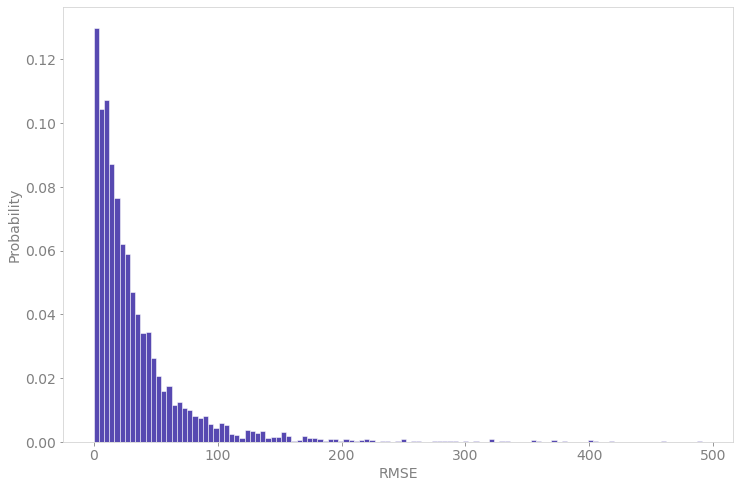

In [125]:
themes.theme_minimal(grid=False,palette=themes.palettes.Diverging.bluepurple)
sns.histplot(df_test_pred_test,x="RMSE",stat="probability")
plt.savefig("figure_19.svg")


### Interpretation of the model

     |████████████████████████████████| 327kB 5.3MB/s 


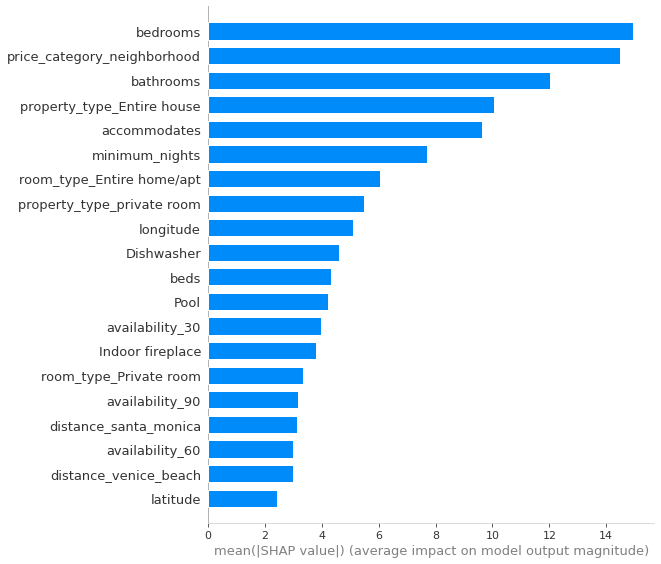

In [126]:
# Installing and importing shap
!pip install --quiet shap
import shap
# Using Shap tree explainer to generate shap values
explainer = shap.TreeExplainer(cat_new)
shap_values = explainer.shap_values(X_test_new_nonscaled)

# Creating Feauture importance graph
shap.summary_plot(shap_values, X_test_new_nonscaled,plot_type="bar",)


 True Value: 99.0


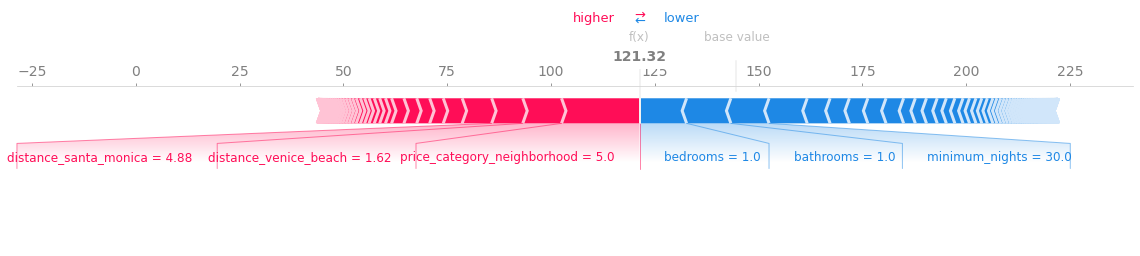

<Figure size 864x576 with 0 Axes>

In [127]:
# Example of a listing

# Matplotlib
print(f' True Value: {y_test_new_nonscaled.iloc[7]}')
shap.force_plot(explainer.expected_value, shap_values[7,:],X_test_new_nonscaled.iloc[7,:],matplotlib=True)
plt.savefig("figure_21.svg")

In [128]:
# Javascript Edition
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[7,:],X_test_new_nonscaled.iloc[7,:],matplotlib=False)